## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [09] : [Algoritma Partisi] </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [10]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Gempar Bambang Godata"
myNIM = "00000067643"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Gempar Bambang Godata
NIM: 		00000067643
Start: 		2023-04-23 21:15:27.081318
Device ID: 	4b9d77c0-e1e1-11ed-98f1-fa88a9ca5555


### Deskripsi Singkat Dataset:

   1. Fashion MNIST
   Fashion-MNIST adalah kumpulan data gambar dari kaggle Zalando yang terdiri dari kumpulan training data 70.000 contoh dan kumpulan uji 10.000 contoh. Setiap contoh adalah gambar skala abu-abu 28x28, terkait dengan label dari 10 kelas. Dataset MNIST asli berisi banyaknya digit pixel dari gambar tulisan tangan.
    
   2. Bike  Buyers 1000
   Dataset ini memiliki rincian 1000 pengguna dari berbagai latar belakang dan apakah mereka membeli sepeda atau tidak. Data ini dapat digunakan untuk model prediksi menggunakan Machine Learning Algorithms. Ada beberapa nilai NA yang disuntikkan dalam dataset. Gunakan kumpulan data ini untuk Pembersihan Data, Eksplorasi, dan Visualisasi.

---
### Dataset yang diambil dari repositori:

1. Fashion MNIST – sumber : https://www.kaggle.com/datasets/zalando-research/fashionmnist
2. Bike  Buyers 1000 – sumber : https://www.kaggle.com/datasets/heeraldedhia/bike-buyers
---

## Hasil kerja

## K-Means Clustering 

### Standard imports

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import numpy as np
import sklearn.datasets
import warnings
warnings.filterwarnings('ignore')

In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


### Generate a two-dimensional dataset containing four distinct blobs

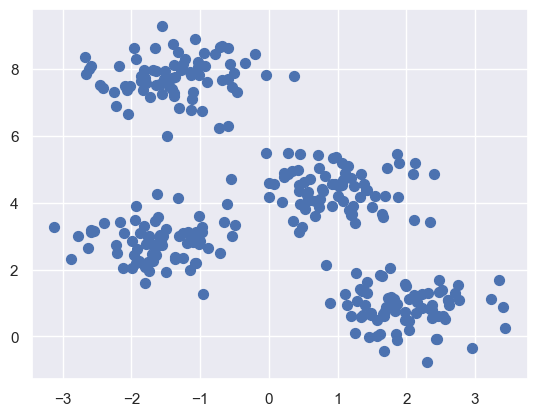

In [13]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 50);

### Pick out the four clusters

In [14]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.cluster import KMeans

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

### Visualize the result by plotting the data colored by these labels

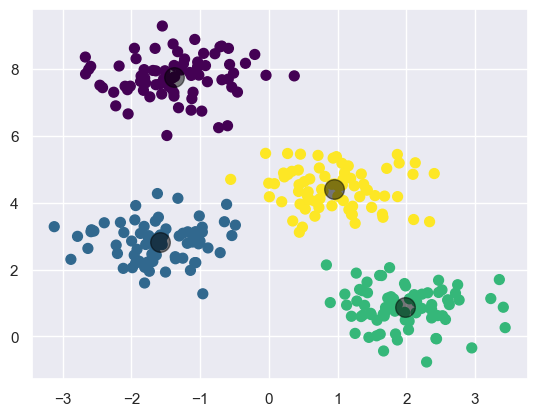

In [17]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5);

### K-Means Algorithm : Expectation-Maximization

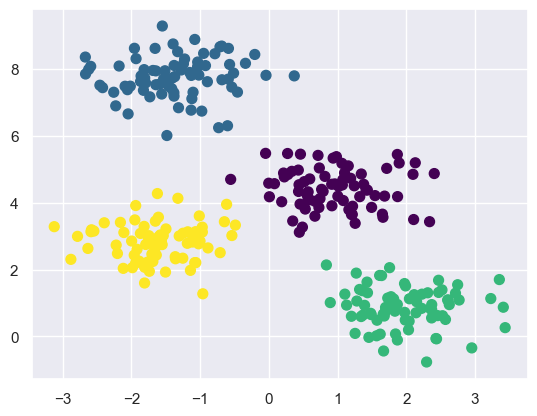

In [18]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed = 2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0]) [:n_clusters]
    centers = X[i]
    
    while True:
        # a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis');

### Caveats of Expectation-Maximization 

#### The globally optimal result may not be achieved 

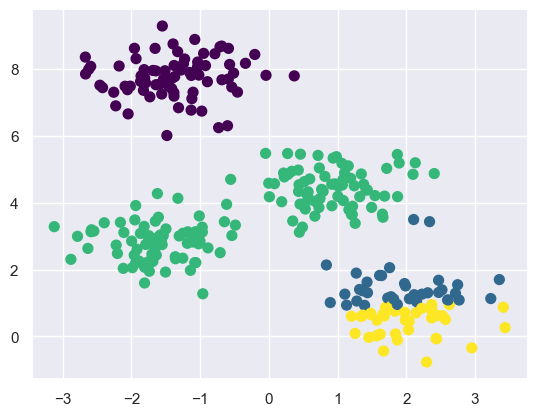

In [19]:
centers, labels = find_clusters(X, 4, rseed = 0)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis');

#### The number of clusters must be selected beforehand 

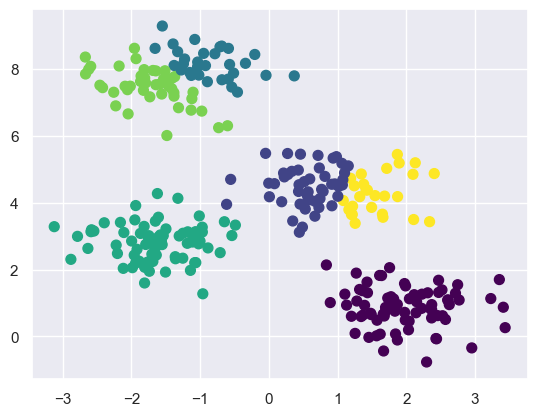

In [20]:
labels = KMeans(6, random_state = 0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis');

### k-Means is Limited to Linear Cluster Boundaries 

In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise = .05, random_state = 0)

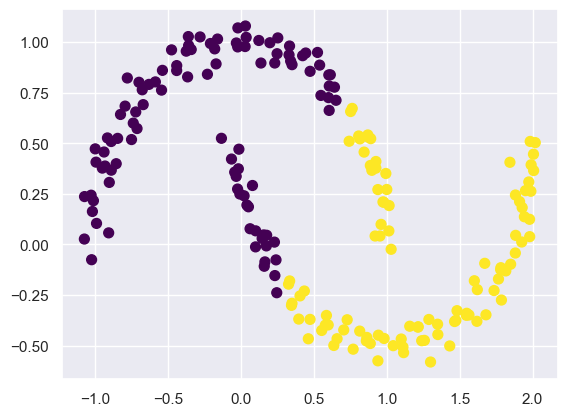

In [22]:
labels = KMeans(2, random_state = 0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis');

### Uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm

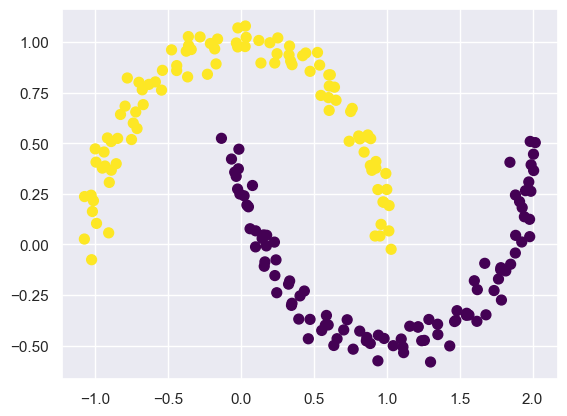

In [23]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', assign_labels = 'kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis');

## Example : k-means on digits 

### Loading the digits and then finding the KMeans clusters

In [26]:
import pandas as pd

In [27]:
data = pd.read_csv('fashion-mnist_train.csv')
data = data[0:50]
data.shape

(50, 785)

### Clustering

<function matplotlib.pyplot.show(close=None, block=None)>

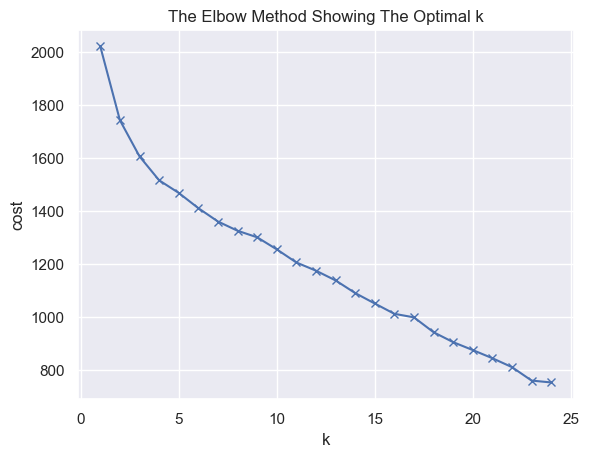

In [28]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1, 25)
for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(data)
    kmeanModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / data.shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('cost')
plt.title('The Elbow Method Showing The Optimal k')
plt.show

In [29]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(data.drop(columns = ['label']))
kmeans.cluster_centers_.shape

(10, 784)

### See what these cluster centers look like

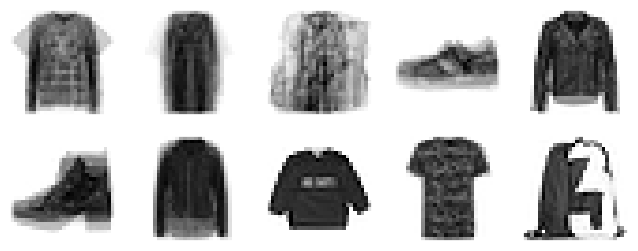

In [30]:
fig, ax = plt.subplots(2, 5, figsize = (8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)

### Matching each learned cluster label with the true labels found in cluster and label

In [31]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(9):
    mask = (clusters == 1)
    labels[mask] = mode(data["label"][mask])[0]

### Check how accurate our unsupervised clustering was in finding similar digits within the data

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(data["label"], labels)

0.16

### Check the confusion matrix 

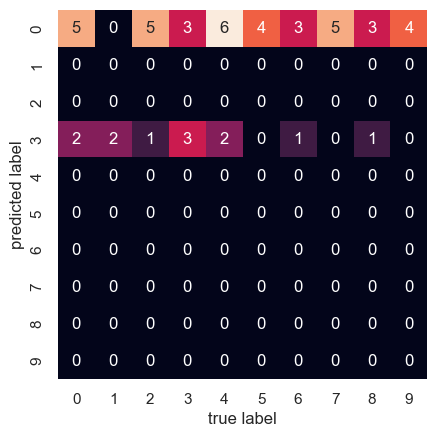

In [33]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(data["label"], labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, xticklabels = np.unique(data["label"]), yticklabels = np.unique(data["label"]))
plt.xlabel('true label')
plt.ylabel('predicted label');

## Example : k-means for color compression 

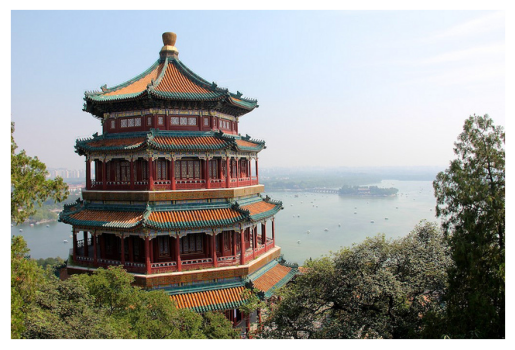

In [34]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china);

In [35]:
china.shape # height, width, RGB

(427, 640, 3)

### Reshape the data to [n_samples x n_features], and rescale the colors so that they lie between 0 and 1

In [36]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

### Visualize these pixels in this color space

In [37]:
def plot_pixels(data, title, colors = None, N = 10000):
    if colors is None:
        colors = data
        
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize = (16, 6))
    ax[0].scatter(R, G, color = colors, marker = '.')
    ax[0].set(xlabel = 'Red', ylabel = 'Green', xlim = (0, 1), ylim = (0, 1))
    
    ax[1].scatter(R, B, color = colors, marker = '.')
    ax[1].set(xlabel = 'Red', ylabel = 'Blue', xlim = (0, 1), ylim = (0, 1))
    
    fig.suptitle(title, size = 20);

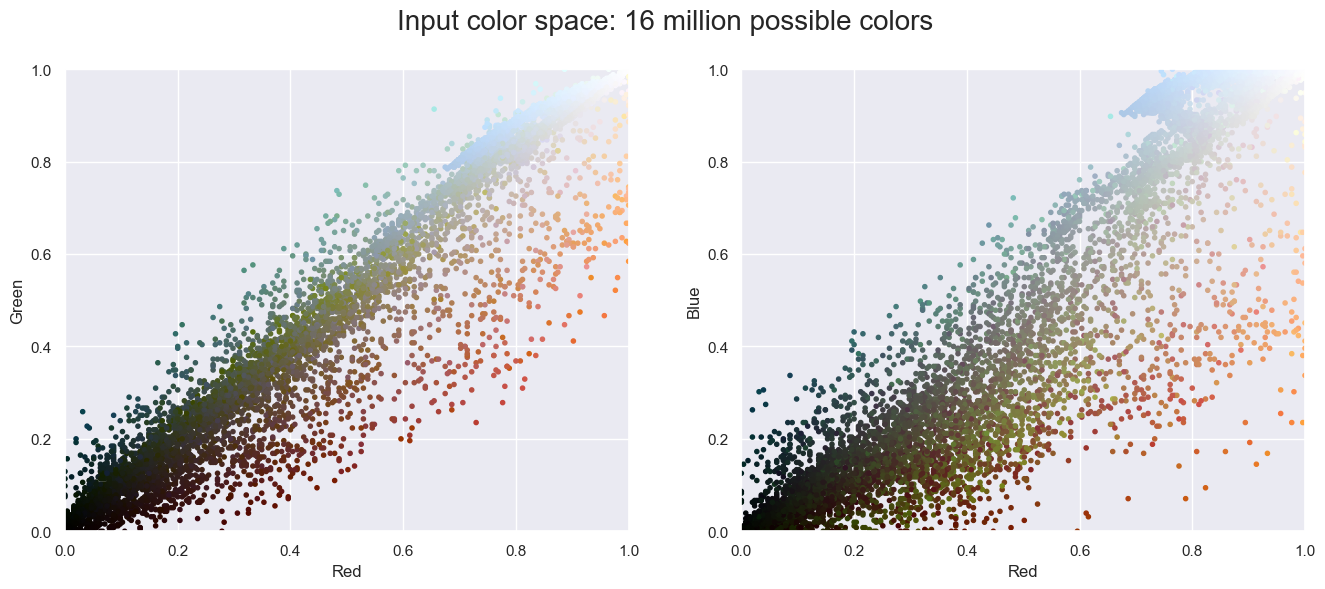

In [38]:
plot_pixels(data, title = 'Input color space: 16 million possible colors')

### Reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space

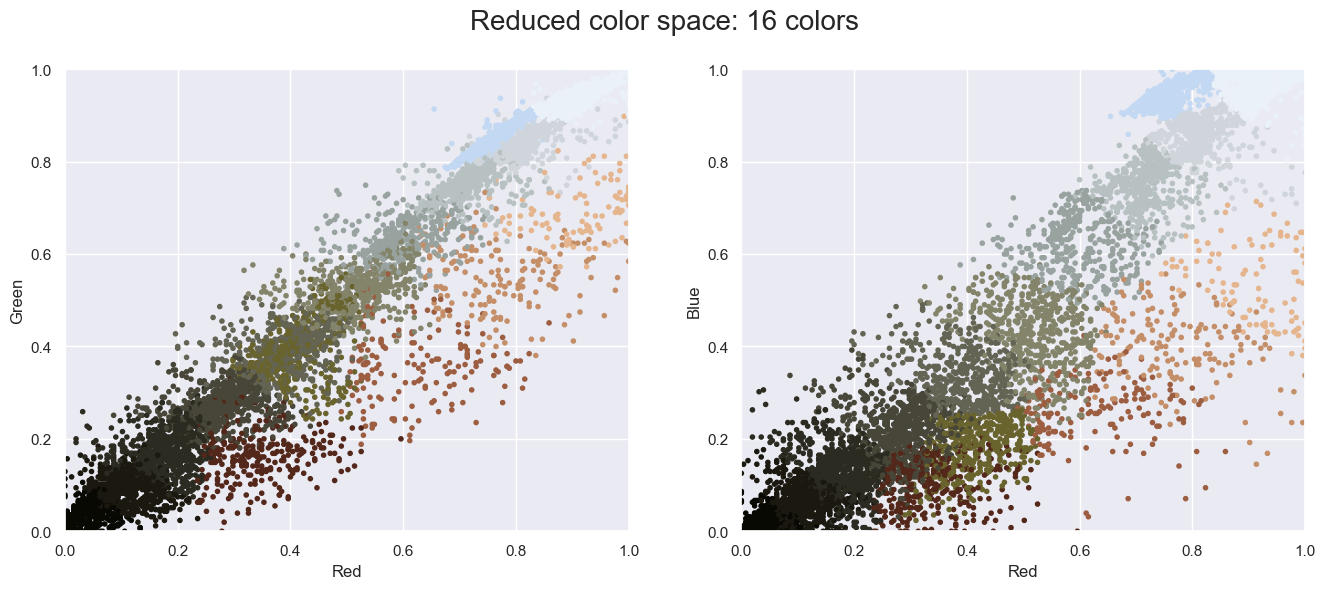

In [39]:
import warnings; warnings.simplefilter('ignore') # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors = new_colors, title = "Reduced color space: 16 colors")

### Plotting these new colors in the image space rather than the pixel space shows us the effect of this:

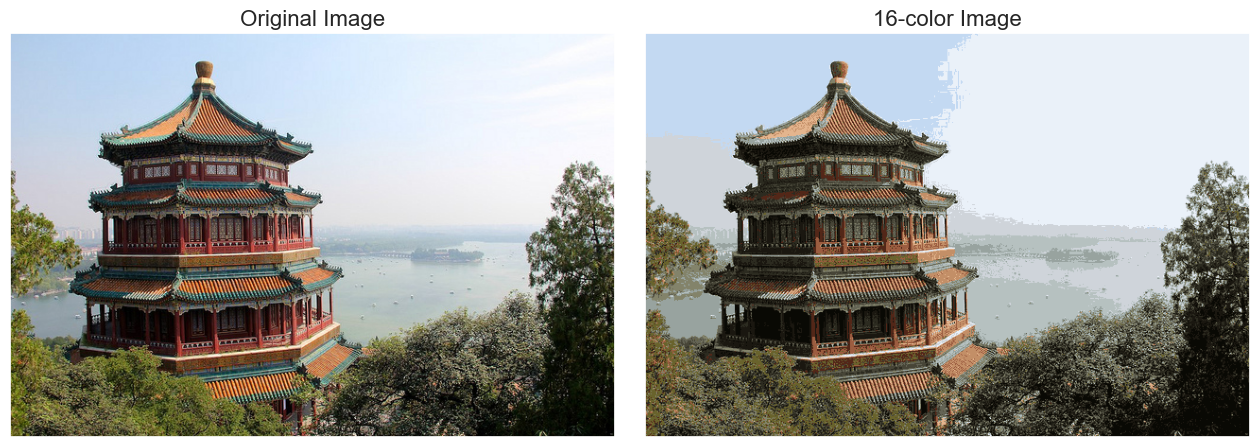

In [40]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize = (16, 6), subplot_kw = dict(xticks = [], yticks = []))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size = 16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size = 16);

## K-Medoids Algorithm 

### Import the important libraries

In [41]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

### Load the dataset

In [42]:
df = pd.read_csv('fashion-mnist_train.csv')
df = df.dropna(subset = ["pixel3"])[0:400]
data = df[["pixel1", "pixel2", "pixel3", "pixel4"]]
target = np.unique(df["label"])
maps = {label: idx for idx, label in enumerate(np.unique(df["label"]))}
labels = df["label"].map(maps)

### Since there is no missing data, scaling the data for these types of problem when data is on different scales across the columns

In [43]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data

,pixel1,pixel2,pixel3,pixel4
0,0.0,0.0,0.0,0.00
1,0.0,0.0,0.0,0.00
2,0.0,0.0,0.0,0.00
3,0.0,0.0,0.0,0.05
4,0.0,0.0,0.0,0.00
...,...,...,...,...
395,0.0,0.0,0.0,0.00
396,0.0,0.0,0.0,0.00
397,0.0,0.0,0.0,0.00
398,0.0,0.0,0.0,0.00


### Employ the Principal Component Analysis (PCA) to transform 4-dimensional data into 3-dimensional data while keeping the significance of those predictors with the PCA class from sklearn

In [44]:
# PCA Transformation
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(data)
PCAdf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

datapoints = PCAdf.values
m, f = datapoints.shape
k = 3
datapoints

array([[-0.00829376, -0.00074116,  0.00156175],
       [-0.00829376, -0.00074116,  0.00156175],
       [-0.00829376, -0.00074116,  0.00156175],
       ...,
       [-0.00829376, -0.00074116,  0.00156175],
       [-0.00829376, -0.00074116,  0.00156175],
       [-0.00829376, -0.00074116,  0.00156175]])

### Visualize on a 3-D plane

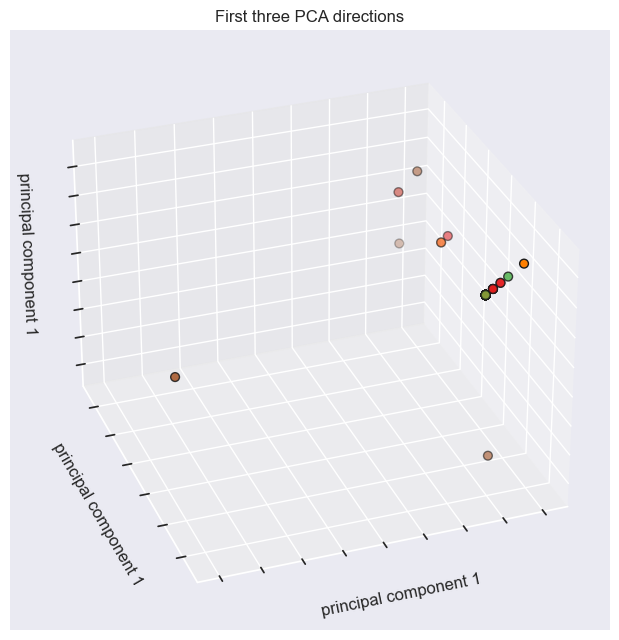

In [45]:
# Visualization
fig = plt.figure(1, figsize = (8, 6))
ax = Axes3D(fig, elev = -150, azim = 110, auto_add_to_figure = False)
fig.add_axes(ax)
X_reduced = datapoints
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c = labels, cmap = plt.cm.Set1, edgecolor = 'k', s = 40)
ax.set_title("First three PCA directions")
ax.set_xlabel("principal component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("principal component 1")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("principal component 1")
ax.w_zaxis.set_ticklabels([])
plt.show()

## Medoid Initialization

### Initial guess

In [46]:
def init_medoids(X, k):
    from numpy.random import choice
    from numpy.random import seed
    
    seed(1)
    samples = choice(len(X), size = k, replace = False)
    return X[samples, :]

medoids_initial = init_medoids(datapoints, 3)
print(medoids_initial)

[[-0.00829376 -0.00074116  0.00156175]
 [-0.00829376 -0.00074116  0.00156175]
 [-0.00829376 -0.00074116  0.00156175]]


### Computing the Distances

In [47]:
def compute_d_p(X, medoids, p):
    m = len(X)
    medoids_shape = medoids.shape
    # If a 1-D array is provided
    # it will be reshaped to a single row 2-D array
    if len(medoids_shape) == 1:
        medoids = medoids.reshape((1, len(medoids)))
    k = len(medoids)
    
    S = np.empty((m, k))
    
    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, ord = p, axis = 1)
        S[i, :] = d_i**p
        
    return S
    
S = compute_d_p(datapoints, medoids_initial, 2)
S

array([[3.37298289e-31, 3.37298289e-31, 3.37298289e-31],
       [3.09181933e-32, 3.09181933e-32, 3.09181933e-32],
       [7.26146354e-33, 7.26146354e-33, 7.26146354e-33],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### Cluster Assignment 

In [48]:
def assign_labels(S):
    return np.argmin(S, axis = 1)

labels = assign_labels(S)

### Swap Test

In [49]:
def update_medoids(X, medoids, p):
    
    S = compute_d_p(datapoints, medoids, p)
    labels = assign_labels(S)
    
    out_medoids = medoids
    
    for i in set(labels):
        
        avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i], p))
        
        cluster_points = datapoints[labels == i]
        
        for datap in cluster_points:
            new_medoid = datap
            new_dissimilarity = np.sum(compute_d_p(datapoints, datap, p))
            
            if new_dissimilarity < avg_dissimilarity :
                avg_dissimilarity = new_dissimilarity
                
                out_medoids[i] = datap
                
    return out_medoids

#### Checks whether the medoid have “moved”, given two instances of the medoid values

In [50]:
def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

### Putting all Together 

In [51]:
# Full Algorithm
def kmedoids(X, k, p, starting_medoids = None, max_steps = np.inf):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids
        
    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()
        
        S = compute_d_p(X, medoids, p)
        
        labels = assign_labels(S)
        
        medoids = update_medoids(X, medoids, p)
        
        converged = has_converged(old_medoids, medoids)
        i += 1
    return (medoids, labels)

results = kmedoids(datapoints, 3, 2)
final_medoids = results[0]
data['clusters'] = results[1]

final_medoids

array([[-0.00829376, -0.00074116,  0.00156175],
       [-0.00829376, -0.00074116,  0.00156175],
       [-0.00829376, -0.00074116,  0.00156175]])

In [52]:
print(data['clusters'])

0      1
1      1
2      0
3      0
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: clusters, Length: 400, dtype: int64


In [53]:
# Count
def mark_matches(a, b, exact = False):
    assert a.shape == b.shape
    a_int = a.astype(dtype = int)
    b_int = b.astype(dtype = int)
    all_axes = tuple(range(len(a.shape)))
    assert ((a_int == 0) | (a_int == 1) | (a_int == 2)).all()
    assert ((b_int == 0) | (b_int == 1) | (b_int == 2)).all()
    
    exact_matches = (a_int == b_int)
    if exact:
        return exact_matches
    
    assert exact == False
    num_exact_matches = np.sum(exact_matches)
    if(2 * num_exact_matches) >= np.prod (a.shape):
        return exact_matches
    return exact_matches == False # Invert

In [54]:
def count_matches(a, b, exact = False):
    matches = mark_matches(a, b, exact = exact)
    return np.sum(matches)

n_matches = count_matches(labels, data['clusters'])
print(n_matches, "matches out of", len(data), "data points", "(~ {:.1f}%)".format(100.0 * n_matches / len(labels)))

380 matches out of 400 data points (~ 95.0%)


## K-Modes Algorithm : Unsupervised Learning for Categorical Data 

### Import the important libraries

In [55]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

### Reading the data and understanding the data and shown the data 

In [56]:
bike = pd.read_csv('bike_buyers.csv')

In [57]:
bike.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


#### Show the data columns and importing the categorical columns

In [58]:
bike.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [59]:
# Importing Categorical Columns
bike = bike[['Marital Status', 'Gender', 'Income', 'Education', 'Occupation', 'Commute Distance', 'Region', 'Purchased Bike']]

#### Show the data after importing

In [60]:
bike = bike.dropna()
bike.head()

,Marital Status,Gender,Income,Education,Occupation,Commute Distance,Region,Purchased Bike
0,Married,Female,40000.0,Bachelors,Skilled Manual,0-1 Miles,Europe,No
1,Married,Male,30000.0,Partial College,Clerical,0-1 Miles,Europe,No
2,Married,Male,80000.0,Partial College,Professional,2-5 Miles,Europe,No
4,Single,Male,30000.0,Bachelors,Clerical,0-1 Miles,Europe,Yes
5,Married,Female,10000.0,Partial College,Manual,1-2 Miles,Europe,No


#### Converting age into categorical value

In [61]:
# Converting age into categorical variable.
bike['Income_label'] = pd.cut(bike['Income'], [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000], labels = ['10000-20000', '20001-30000', '30001-40000', '40001-50000', '50001-60000', '60001-70000', '70001-80000', '80001-90000', '90001-100000', '100001-110000', '110001-120000', '120001-130000', '130001-140000', '140001-150000', '150001-160000', '160001-170000'])
bike = bike.drop('Income', axis = 1)

#### Take a look the data after converting

In [62]:
bike.head()

,Marital Status,Gender,Education,Occupation,Commute Distance,Region,Purchased Bike,Income_label
0,Married,Female,Bachelors,Skilled Manual,0-1 Miles,Europe,No,30001-40000
1,Married,Male,Partial College,Clerical,0-1 Miles,Europe,No,20001-30000
2,Married,Male,Partial College,Professional,2-5 Miles,Europe,No,70001-80000
4,Single,Male,Bachelors,Clerical,0-1 Miles,Europe,Yes,20001-30000
5,Married,Female,Partial College,Manual,1-2 Miles,Europe,No,NaN


### Data inspection

In [63]:
bike.shape

(977, 8)

In [64]:
bike.describe()

,Marital Status,Gender,Education,Occupation,Commute Distance,Region,Purchased Bike,Income_label
count,977,977,977,977,977,977,977,904
unique,2,2,5,5,5,3,2,15
top,Married,Male,Bachelors,Professional,0-1 Miles,North America,No,50001-60000
freq,526,491,296,268,352,499,509,161


In [65]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Marital Status    977 non-null    object  
 1   Gender            977 non-null    object  
 2   Education         977 non-null    object  
 3   Occupation        977 non-null    object  
 4   Commute Distance  977 non-null    object  
 5   Region            977 non-null    object  
 6   Purchased Bike    977 non-null    object  
 7   Income_label      904 non-null    category
dtypes: category(1), object(7)
memory usage: 62.7+ KB


### Data cleaning

In [66]:
# Checking Null values
bike.isnull().sum() * 100 / bike.shape[0]

Marital Status      0.000000
Gender              0.000000
Education           0.000000
Occupation          0.000000
Commute Distance    0.000000
Region              0.000000
Purchased Bike      0.000000
Income_label        7.471853
dtype: float64

In [67]:
# First we will keep a copy of data
bike_copy = bike.copy()

#### Data preprocessing with LabelEncoder

In [68]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bike = bike.apply(le.fit_transform)
bike.head()

,Marital Status,Gender,Education,Occupation,Commute Distance,Region,Purchased Bike,Income_label
0,0,0,0,4,0,0,0,8
1,0,1,3,0,0,0,0,7
2,0,1,3,3,3,0,0,12
4,1,1,0,0,0,0,1,7
5,0,0,3,2,1,0,0,15


### Installing the kmodes to building the model

In [69]:
!pip install kmodes

In [70]:
pip install --upgrade kmodes

Note: you may need to restart the kernel to use updated packages.


### Importing the important libraries

In [71]:
# Importing Libraries
from kmodes.kmodes import KModes

### Using k-modes with “Cao” Initialization

In [72]:
km_cao = KModes(n_clusters = 2, init = "Cao", n_init = 1, verbose = 1)
fitClusters_cao = km_cao.fit_predict(bike)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 100, cost: 3997.0


In [73]:
# Predicted Clusters
fitClusters_cao

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [74]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bike.columns

In [75]:
# Mode of the clusters
clusterCentroidsDf

,Marital Status,Gender,Education,Occupation,Commute Distance,Region,Purchased Bike,Income_label
0,0,1,0,3,0,1,0,8
1,1,0,3,4,4,1,1,7


### Using k-modes with “Huang” initialization

In [76]:
km_huang = KModes(n_clusters = 2, init = "Huang", n_init = 1, verbose = 1)
fitClusters_huang = km_huang.fit_predict(bike)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 267, cost: 4009.0
Run 1, iteration: 2/100, moves: 79, cost: 4009.0


In [77]:
# Predicted Clusters
fitClusters_huang

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

### Choosing K by comparing Cost against each K

In [78]:
cost = []
for num_clusters in list(range(1, 5)):
    kmode = KModes(n_clusters = num_clusters, init = "Cao", n_init = 1, verbose = 1)
    kmode.fit_predict(bike)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4714.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 100, cost: 3997.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 144, cost: 3602.0
Run 1, iteration: 2/100, moves: 21, cost: 3602.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 89, cost: 3467.0
Run 1, iteration: 2/100, moves: 3, cost: 3467.0


#### Plotting the data frame

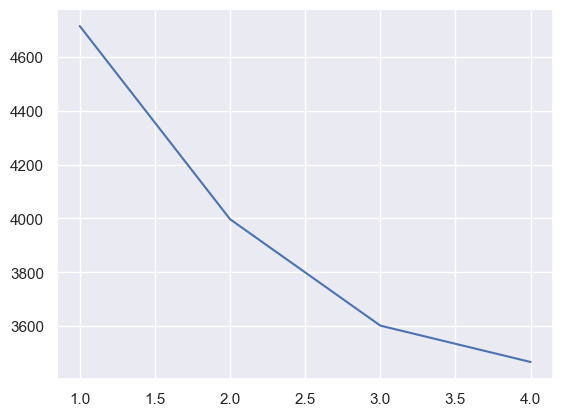

In [79]:
y = np.array([i for i in range(1, 5, 1)])
plt.plot(y, cost)

In [80]:
## Choosing K = 2
km_cao = KModes(n_clusters = 2, init = "Cao", n_init = 1, verbose = 1)
fitClusters_cao = km_cao.fit_predict(bike)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 100, cost: 3997.0


#### The result after fit the cluster

In [81]:
fitClusters_cao

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

### Combining the predicted clusters with the original data frame

In [82]:
bike = bike_copy.reset_index()

In [83]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bike, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

#### Take a look the data after combining

In [84]:
combinedDf.head()

,Marital Status,Gender,Education,Occupation,Commute Distance,Region,Purchased Bike,Income_label,cluster_predicted
0,Married,Female,Bachelors,Skilled Manual,0-1 Miles,Europe,No,30001-40000,0
1,Married,Male,Partial College,Clerical,0-1 Miles,Europe,No,20001-30000,0
2,Married,Male,Partial College,Professional,2-5 Miles,Europe,No,70001-80000,0
3,Single,Male,Bachelors,Clerical,0-1 Miles,Europe,Yes,20001-30000,0
4,Married,Female,Partial College,Manual,1-2 Miles,Europe,No,NaN,0


### Cluster identification

In [85]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

#### Display cluster info

In [86]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 976
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Marital Status     648 non-null    object  
 1   Gender             648 non-null    object  
 2   Education          648 non-null    object  
 3   Occupation         648 non-null    object  
 4   Commute Distance   648 non-null    object  
 5   Region             648 non-null    object  
 6   Purchased Bike     648 non-null    object  
 7   Income_label       597 non-null    category
 8   cluster_predicted  648 non-null    uint16  
dtypes: category(1), object(7), uint16(1)
memory usage: 43.1+ KB


In [87]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 7 to 969
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Marital Status     329 non-null    object  
 1   Gender             329 non-null    object  
 2   Education          329 non-null    object  
 3   Occupation         329 non-null    object  
 4   Commute Distance   329 non-null    object  
 5   Region             329 non-null    object  
 6   Purchased Bike     329 non-null    object  
 7   Income_label       307 non-null    category
 8   cluster_predicted  329 non-null    uint16  
dtypes: category(1), object(7), uint16(1)
memory usage: 22.2+ KB


#### Plotting the result based on attributes

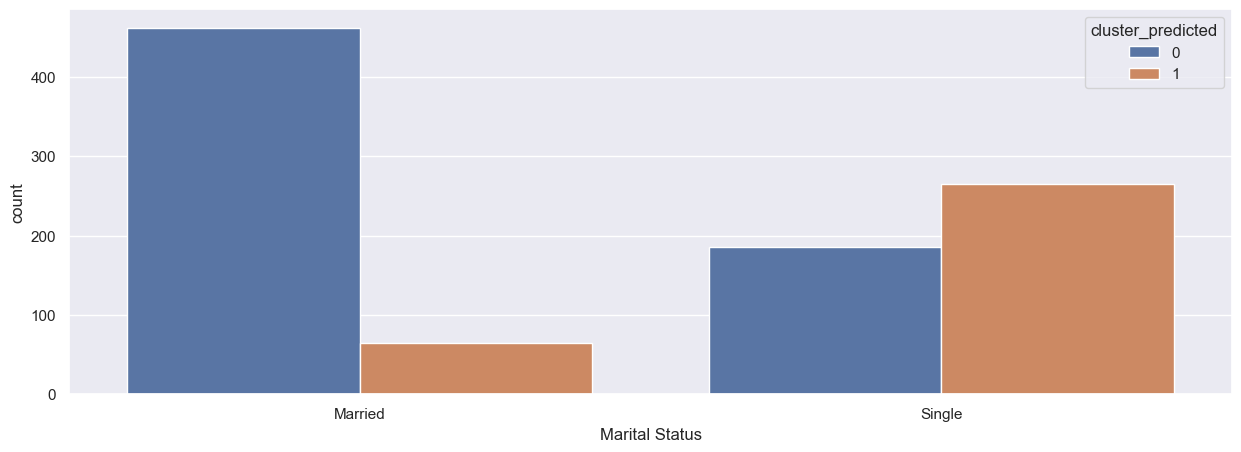

In [88]:
# Martial Status
plt.subplots(figsize = (15, 5))
sns.countplot(x = combinedDf['Marital Status'], order = combinedDf['Marital Status'].value_counts().index, hue = combinedDf['cluster_predicted'])
plt.show()

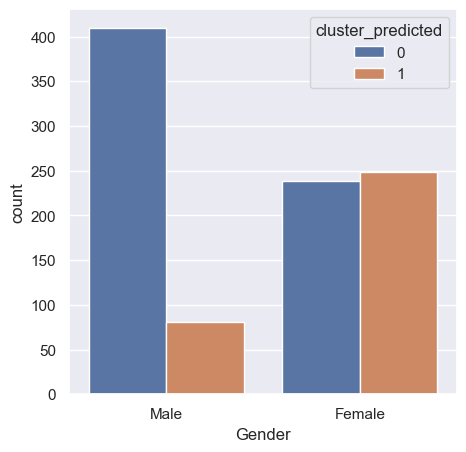

In [89]:
# Gender
plt.subplots(figsize = (5, 5))
sns.countplot(x = combinedDf['Gender'], order = combinedDf['Gender'].value_counts().index, hue = combinedDf['cluster_predicted'])
plt.show()

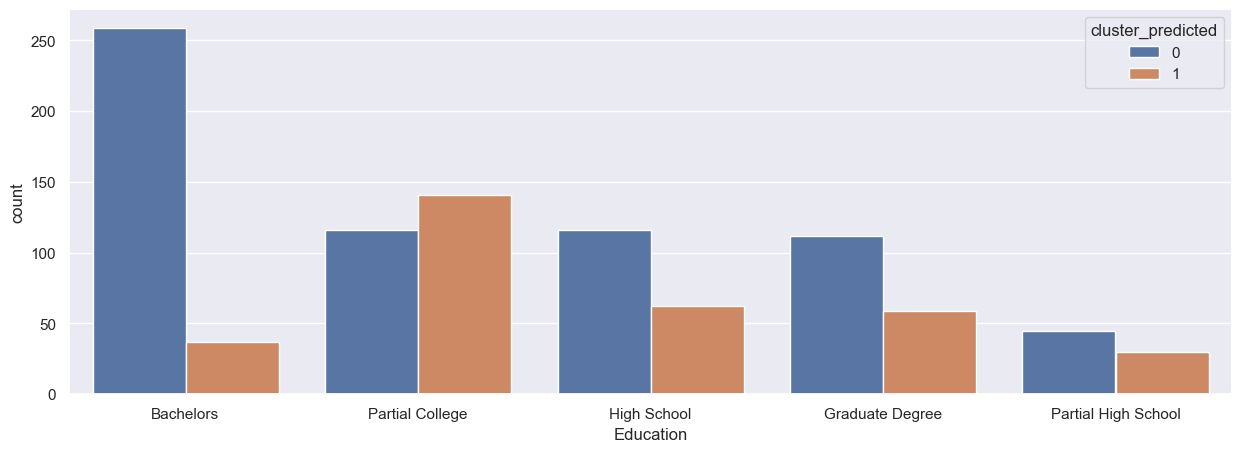

In [90]:
# Education
plt.subplots(figsize = (15, 5))
sns.countplot(x = combinedDf['Education'], order = combinedDf['Education'].value_counts().index, hue = combinedDf['cluster_predicted'])
plt.show()

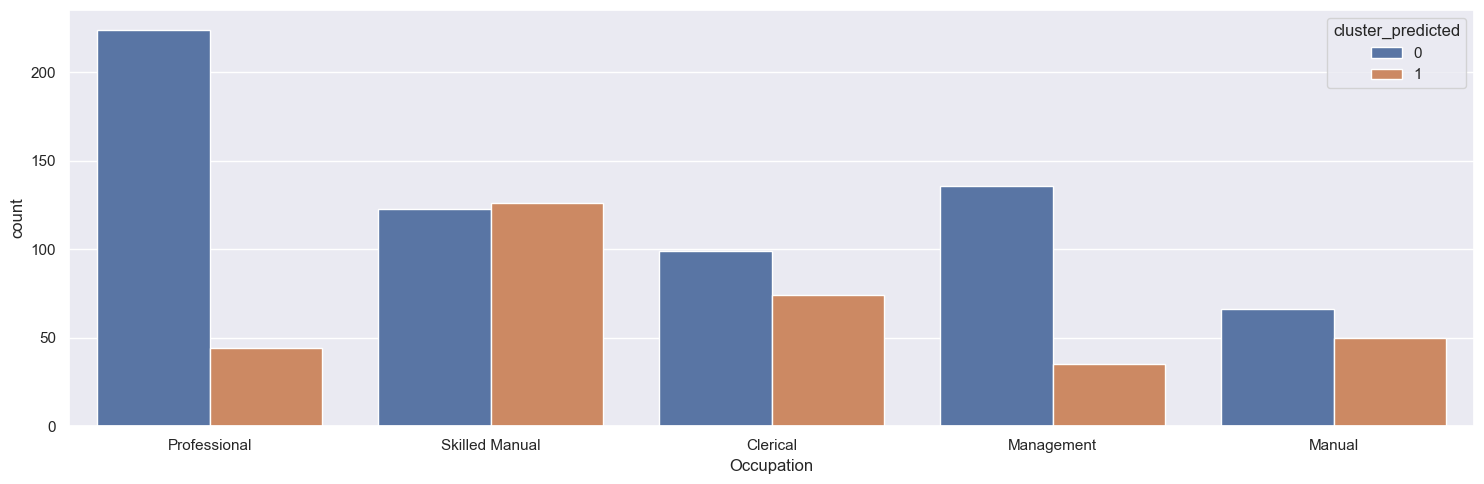

In [91]:
# Occupation
plt.subplots(figsize = (15, 5))
sns.countplot(x = combinedDf['Occupation'], order = combinedDf['Occupation'].value_counts().index, hue = combinedDf['cluster_predicted'])

plt.tight_layout()
plt.show()

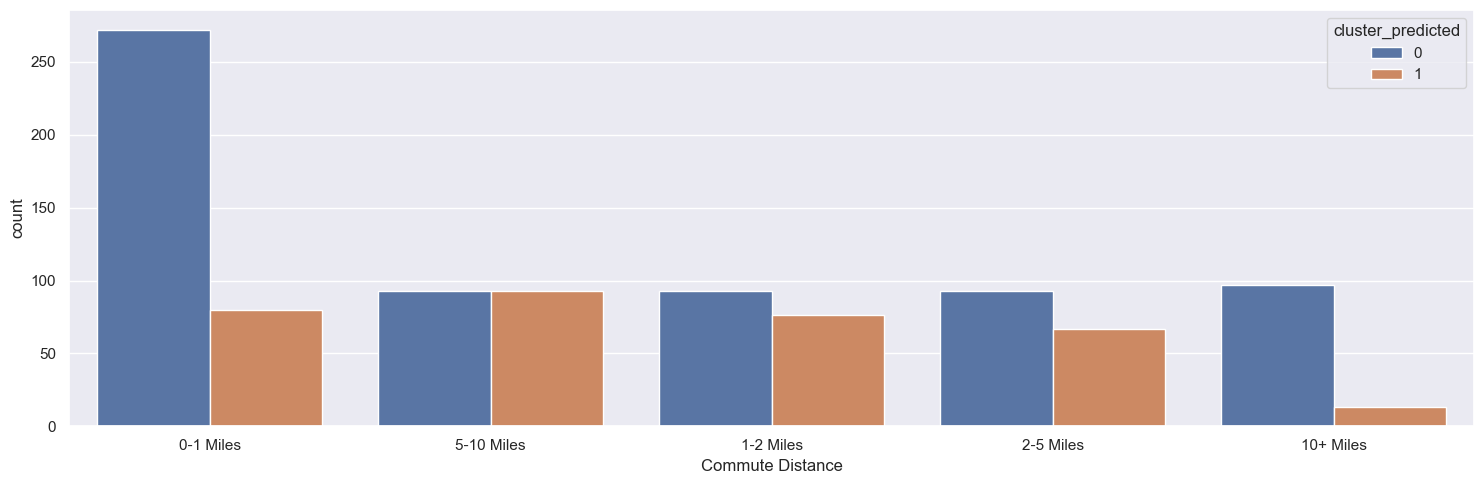

In [92]:
# Commute Distance
plt.subplots(figsize = (15, 5))
sns.countplot(x = combinedDf['Commute Distance'], order = combinedDf['Commute Distance'].value_counts().index, hue = combinedDf['cluster_predicted'])

plt.tight_layout()
plt.show()

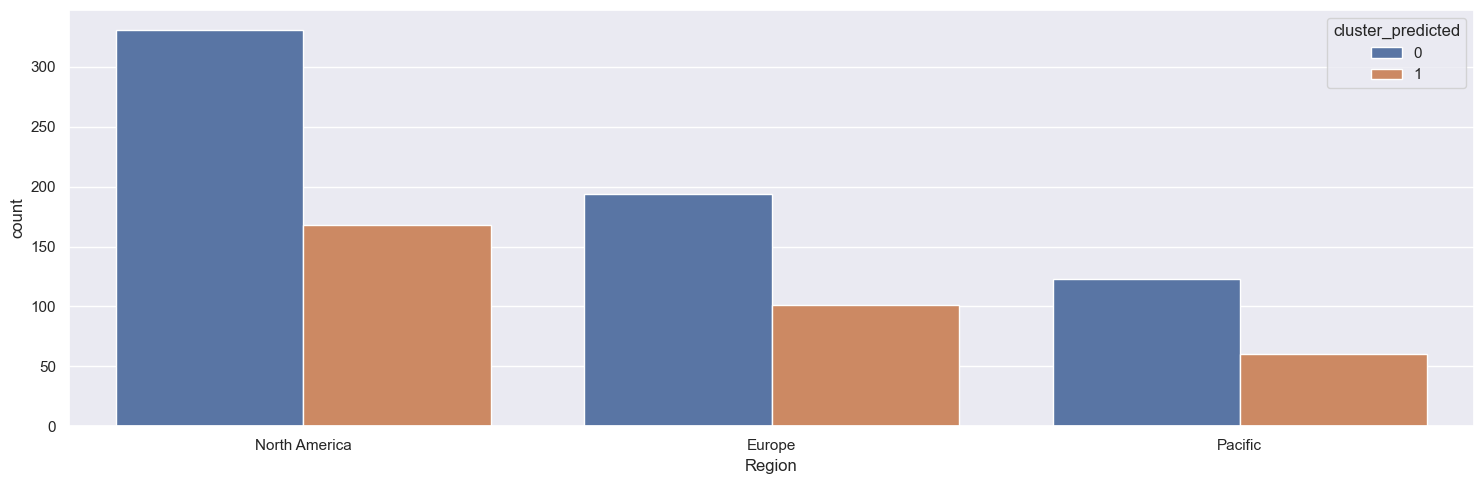

In [93]:
# Region
plt.subplots(figsize = (15, 5))
sns.countplot(x = combinedDf['Region'], order = combinedDf['Region'].value_counts().index, hue = combinedDf['cluster_predicted'])

plt.tight_layout()
plt.show()

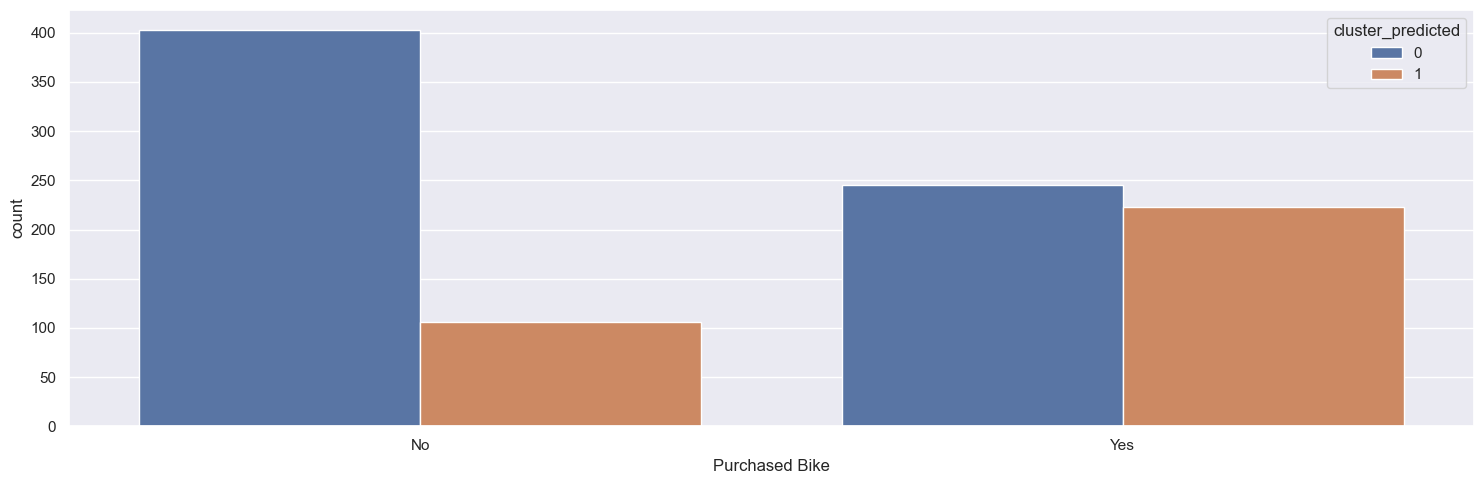

In [94]:
# Purchased Bike
plt.subplots(figsize = (15, 5))
sns.countplot(x = combinedDf['Purchased Bike'], order = combinedDf['Purchased Bike'].value_counts().index, hue = combinedDf['cluster_predicted'])

plt.tight_layout()
plt.show()

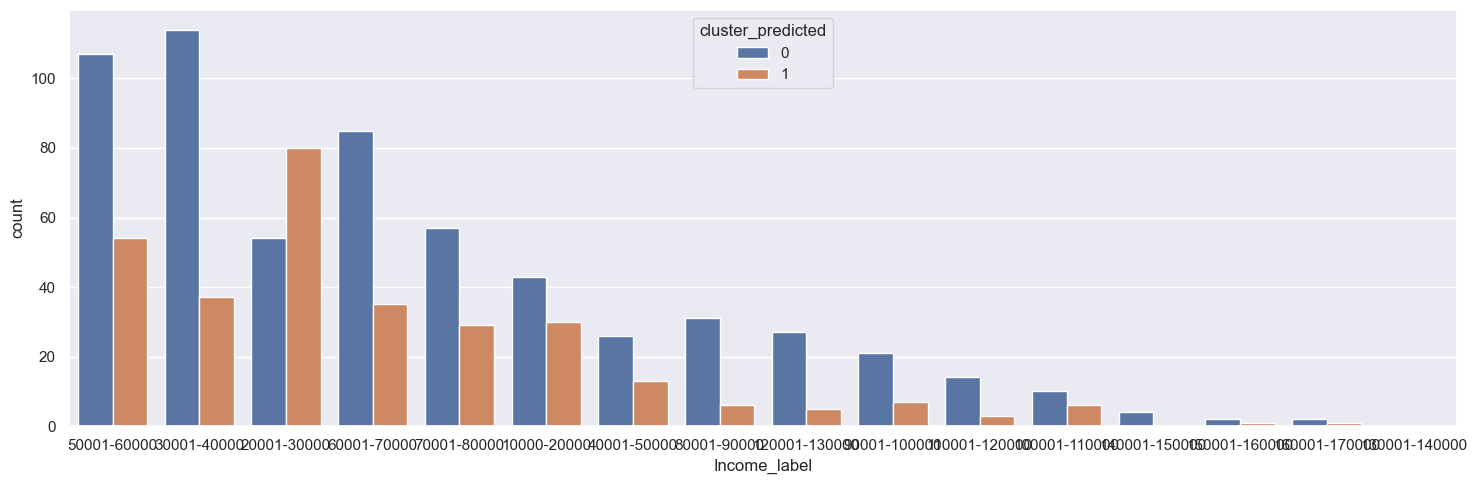

In [95]:
# Income_label
plt.subplots(figsize = (15, 5))
sns.countplot(x = combinedDf['Income_label'], order = combinedDf['Income_label'].value_counts().index, hue = combinedDf['cluster_predicted'])

plt.tight_layout()
plt.show()

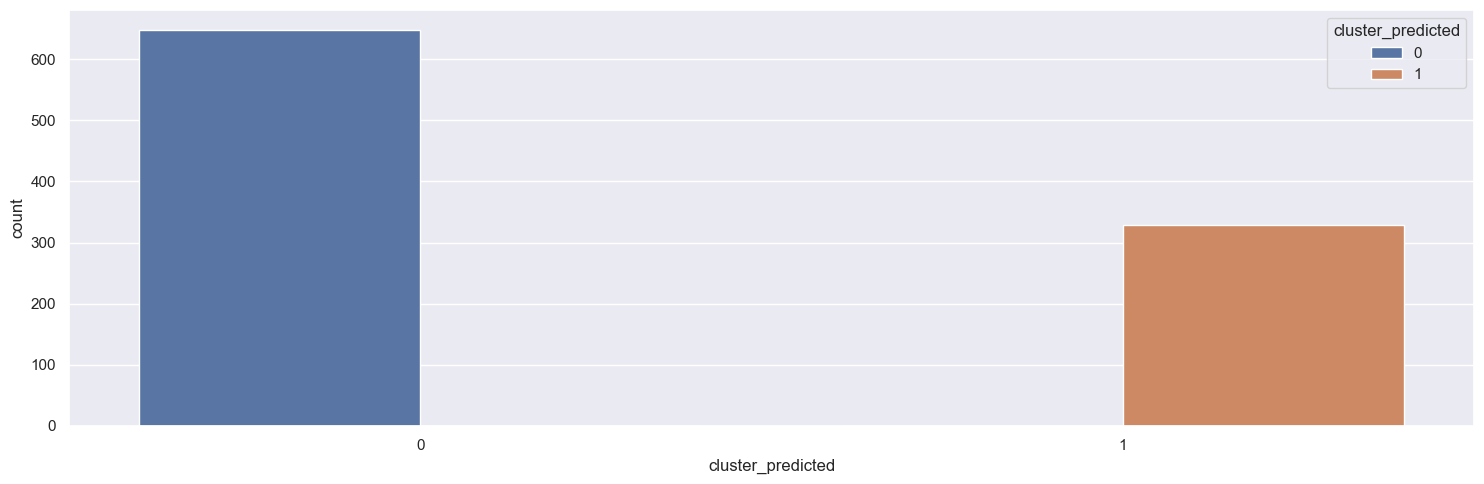

In [96]:
# cluster_predicted
plt.subplots(figsize = (15, 5))
sns.countplot(x = combinedDf['cluster_predicted'], order = combinedDf['cluster_predicted'].value_counts().index, hue = combinedDf['cluster_predicted'])

plt.tight_layout()
plt.show()

### Kesimpulan


  - Pada praktikum kali ini, saya menggunakan datasets dari Fashion MNIST dan Bike Byures 1000. Modul mengajarkan model yang diaplikasikan pada meliputi: K-means (dengan dataset Fashion MNIST), K-medoid (dengan dataset Fashion MNIST), dan K-modes (dengan dataset Bike Byures 1000).
  - K-means merupakan algoritma yang membutuhkan parameter input sebanyak k dan membagi sekumpulan n objek kedalam k cluster sehingga tingkat kemiripan antar anggota dalam satu cluster tinggi. Sedangkan tingkat kemiripan dengan anggota pada cluster lain sangatlah rendah.
  - K-Means memiliki tujuan untuk meminimalisasikan fungsi objective yang telah di set dalam proses clustering. Tujuan tersebut dilakukan dengan cara meminimalikan variasi data yang ada didalam cluster dan memaksimalikan variasi data yang ada di cluster lainnya.
  - Algoritma K-medoids atau dikenal pula dengan PAM (Partitioning Around Medoids) menggunakan metode partisi clustering untuk mengelompokkan sekumpulan n objek menjadi sejumlah k cluster. Algoritma ini menggunakan objek pada kumpulan objek untuk mewakili sebuah cluster.
  - K-modes merupakan salah satu teknik dalam analisis clustering yang merupakan perluasan dari algoritma k-means untuk mengelompokkan data kategorik. Perbedaan dari K-means dan Kmedoids terletak pada pemilihan data point sebagai pusatnya.

In [97]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Gempar Bambang Godata
NIM: 	00000067643
Time-stamp:	2023-04-23 21:16:53.566055


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [100]:
!jupyter nbconvert --to html "./IF540L_Kelas_A_laporan_M09_00000067643_GemparBambangGodata.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540L_Kelas_A_laporan_M09_00000067643_GemparBambangGodata.ipynb to html
[NbConvertApp] Writing 4255280 bytes to IF540L_Kelas_A_laporan_M09_00000067643_GemparBambangGodata.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#